![alt text](Questão5.png)


Hamiltoniana H (6x6):
      N(1)  C(2)  C(3)  C(4)  C(5)  C(6)
N(1)   0.5  -0.9   0.0   0.0   0.0  -0.9
C(2)  -0.9   0.0  -1.0   0.0   0.0   0.0
C(3)   0.0  -1.0   0.0  -1.0   0.0   0.0
C(4)   0.0   0.0  -1.0   0.0  -1.0   0.0
C(5)   0.0   0.0   0.0  -1.0   0.0  -1.0
C(6)  -0.9   0.0   0.0   0.0  -1.0   0.0

Autovalores e ocupações:
    MO    E (eV)    E/β_CC  ocupação (e)
0  MO1 -1.887195  1.887195           2.0
1  MO2 -1.000000  1.000000           2.0
2  MO3 -0.757389  0.757389           2.0
3  MO4  1.000000 -1.000000           0.0
4  MO5  1.119164 -1.119164           0.0
5  MO6  2.025420 -2.025420           0.0

Populações q_i:
  sítio       q_i
0  N(1)  0.782428
1  C(2)  1.084476
2  C(3)  0.995410
3  C(4)  1.057800
4  C(5)  0.995410
5  C(6)  1.084476

Ordens p_ij (ligações 1º vizinhos):
     ligação      p_ij
0  N(1)–C(2)  0.646662
1  C(2)–C(3)  0.677581
2  C(3)–C(4)  0.660519
3  C(4)–C(5)  0.660519
4  C(5)–C(6)  0.677581
5  C(6)–N(1)  0.646662

Soma das populações q_i = 6.000000


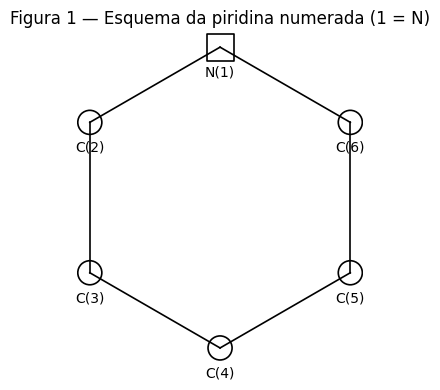

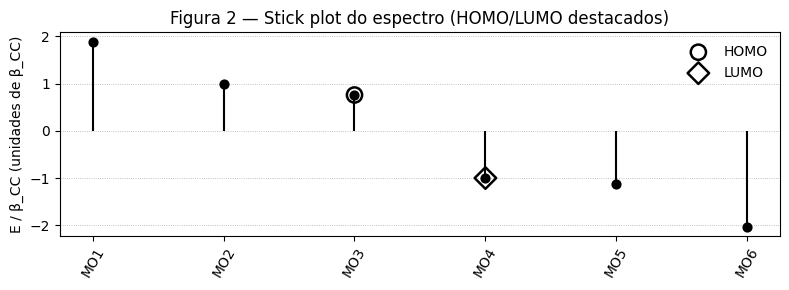

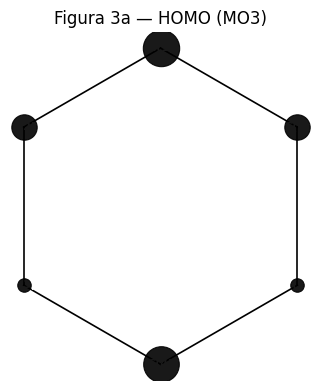

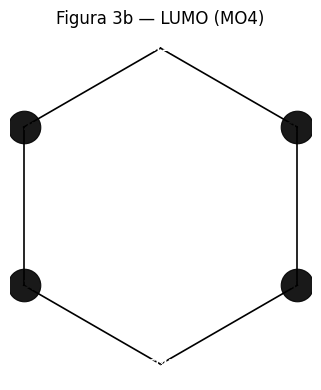

In [1]:
# Hückel π para piridina (C5H5N) 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import isclose

# ------------------ 1) Parâmetros ------------------
alpha_C = 0.00
alpha_N = +0.50
beta_CC = -1.00   # unidade
beta_CN = -0.90

# ------------------ 2) Numeração e conectividade ------------------
# Índices 0..5 (0 = N, 1..5 = C(2)..C(6))
n = 6
labels = [f"N(1)"] + [f"C({i})" for i in range(2,7)]
bonds = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,0)]  # 1º vizinhos (0-based)

# posições para plot (hexágono, indexado 0..5)
angs = np.deg2rad(np.arange(6)*60.0 + 90.0)
xs = np.cos(angs)
ys = np.sin(angs)

# ------------------ 3) Montar H ------------------
H = np.zeros((n,n), dtype=float)
for i in range(n):
    H[i,i] = alpha_N if i==0 else alpha_C
for (i,j) in bonds:
    H[i,j] = H[j,i] = beta_CN if (i==0 or j==0) else beta_CC

# ------------------ 4) Diagonalizar ------------------
evals, evecs = np.linalg.eigh(H)  # ascending
mo_labels = [f"MO{m+1}" for m in range(n)]

# ------------------ 5) Ocupação ------------------
nelec = 6
occ_vec = np.zeros(n, dtype=float)
full_occ = nelec // 2  # 3 MOs ocupados
occ_vec[:full_occ] = 2.0
HOMO_idx = full_occ - 1
LUMO_idx = full_occ
E_gap = evals[LUMO_idx] - evals[HOMO_idx]

# ------------------ 6) Populações q_i ------------------
populations = np.zeros(n, dtype=float)
for mu in range(full_occ):
    populations += occ_vec[mu] * (evecs[:,mu]**2)
soma_q = populations.sum()

# ------------------ 7) Ordens p_ij (ligações 1º vizinhos) ------------------
pij_list = []
for (i,j) in bonds:
    pij = 0.0
    for mu in range(full_occ):
        pij += occ_vec[mu] * (evecs[i,mu] * evecs[j,mu])
    pij_list.append({"ligação": f"{labels[i]}–{labels[j]}", "p_ij": float(pij)})

# ------------------ 8) DataFrames/Tabelas ------------------
df_H = pd.DataFrame(np.round(H,6), index=labels, columns=labels)
df_evals = pd.DataFrame({
    "MO": mo_labels,
    "E (eV)": evals,
    "E/β_CC": evals / beta_CC,
    "ocupação (e)": occ_vec
})
df_pop = pd.DataFrame({"sítio": labels, "q_i": populations.round(6)})
df_pij = pd.DataFrame(pij_list)

# imprimir no console (ou no notebook)
print("\nHamiltoniana H (6x6):")
print(df_H)
print("\nAutovalores e ocupações:")
print(df_evals)
print("\nPopulações q_i:")
print(df_pop)
print("\nOrdens p_ij (ligações 1º vizinhos):")
print(df_pij)
print(f"\nSoma das populações q_i = {soma_q:.6f}")
print(f"HOMO = MO{HOMO_idx+1}, LUMO = MO{LUMO_idx+1}, E_gap = {E_gap:.6f} eV")

# ------------------ 9) Gráficos (tudo em preto) ------------------
plt.rcParams.update({'text.color':'k', 'axes.labelcolor':'k', 'xtick.color':'k', 'ytick.color':'k'})

# helper: desenhar ligações em preto
def desenha_lig(ax):
    for (i,j) in bonds:
        ax.plot([xs[i], xs[j]], [ys[i], ys[j]], color='k', linewidth=1.2, zorder=1)

# Figura 1: esquema numerado (1 = N)
fig, ax = plt.subplots(figsize=(6,4))
desenha_lig(ax)
for i,(x,y) in enumerate(zip(xs,ys)):
    marker = 's' if i==0 else 'o'
    size = 380 if i==0 else 300
    ax.scatter(x, y, s=size, marker=marker, facecolors='none', edgecolors='k', linewidths=1.2, zorder=3)
    ax.text(x, y-0.12, labels[i], ha='center', va='top', fontsize=10, color='k')
ax.set_aspect('equal'); ax.axis('off')
ax.set_title("Figura 1 — Esquema da piridina numerada (1 = N)")
plt.tight_layout()
plt.show()

# Figura 2: Stick plot do espectro (E/β_CC) com HOMO/LUMO destacados
fig, ax = plt.subplots(figsize=(8,3))
xs_mo = np.arange(1, n+1)
ax.vlines(xs_mo, 0, evals/beta_CC, color='k', linewidth=1.5)
ax.scatter(xs_mo, evals/beta_CC, s=40, color='k', zorder=5)
# destacar HOMO/LUMO
ax.scatter(HOMO_idx+1, evals[HOMO_idx]/beta_CC, s=120, marker='o', facecolors='none', edgecolors='k', linewidths=1.8, zorder=6, label='HOMO')
ax.scatter(LUMO_idx+1, evals[LUMO_idx]/beta_CC, s=120, marker='D', facecolors='none', edgecolors='k', linewidths=1.8, zorder=6, label='LUMO')
ax.set_xticks(xs_mo); ax.set_xticklabels(mo_labels, rotation=60)
ax.set_ylabel("E / β_CC (unidades de β_CC)")
ax.set_title("Figura 2 — Stick plot do espectro (HOMO/LUMO destacados)")
ax.legend(frameon=False)
ax.grid(axis='y', linestyle=':', linewidth=0.6)
plt.tight_layout()
plt.show()

# Figura 3: Mapas HOMO (bolhas com fase)
def plot_map_mode(mode_idx, title):
    vec = evecs[:, mode_idx]
    fig, ax = plt.subplots(figsize=(6,4))
    desenha_lig(ax)
    for i,(x,y) in enumerate(zip(xs,ys)):
        c = vec[i]
        tam = 2200 * (c**2) if not isclose(c,0.0) else 40
        # preenche preto para bolha; usar borda preta para definição; rótulo branco para contraste
        ax.scatter(x, y, s=tam, marker='o', facecolors='k' if c>=0 else 'k', edgecolors='k', linewidths=0.8, alpha=0.9, zorder=4)
        ax.text(x, y, labels[i], ha='center', va='center', color='white', fontsize=8, weight='bold')
        # opcional: indicador de sinal (p.ex. um pequeno ponto/contorno), mas bola já preta; mantemos rótulo p/ident.
    ax.set_aspect('equal'); ax.axis('off'); ax.set_title(title)
    plt.tight_layout()
    plt.show()

plot_map_mode(HOMO_idx, f"Figura 3a — HOMO (MO{HOMO_idx+1})")
plot_map_mode(LUMO_idx, f"Figura 3b — LUMO (MO{LUMO_idx+1})")

